# Python Project

## Data Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
ColumnsNames=["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","class"]
DataBlocks=pd.read_csv("C:\\Users\\gusta\\Documents\\Gustave_ISCLA\\ESILV_S7\\Python_for_Data_Analysis\\Projet_final\\page-blocks.data",sep='\s+',names=ColumnsNames)

In [39]:
corr = DataBlocks.corr()
corr.style.background_gradient(cmap='coolwarm')

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
height,1,0.119706,0.622451,-0.0935999,-0.0322484,-0.217943,0.0288815,0.534607,0.536127,0.407248,0.351032
lenght,0.119706,1,0.39135,0.561366,-0.20518,-0.37621,0.0879703,0.394382,0.522107,0.728217,-0.00453995
area,0.622451,0.39135,1,0.0315608,-0.0879972,-0.241354,0.0259701,0.731425,0.782458,0.699446,0.234254
eccen,-0.0935999,0.561366,0.0315608,1,0.128455,-0.0663656,0.13519,0.0368137,0.0606331,0.115405,0.0991955
p_black,-0.0322484,-0.20518,-0.0879972,0.128455,1,0.514982,0.121153,0.0693915,-0.0368242,-0.227392,0.212936
p_and,-0.217943,-0.37621,-0.241354,-0.0663656,0.514982,1,-0.00549616,-0.121745,-0.168803,-0.269294,-0.177085
mean_tr,0.0288815,0.0879703,0.0259701,0.13519,0.121153,-0.00549616,1,0.0757745,0.0445536,-0.0257396,0.0723441
blackpix,0.534607,0.394382,0.731425,0.0368137,0.0693915,-0.121745,0.0757745,1,0.957032,0.622228,0.165633
blackand,0.536127,0.522107,0.782458,0.0606331,-0.0368242,-0.168803,0.0445536,0.957032,1,0.783529,0.156506
wb_trans,0.407248,0.728217,0.699446,0.115405,-0.227392,-0.269294,-0.0257396,0.622228,0.783529,1,0.0337492


The correlation matrix can help us visualized any correlation between any attributes. Here there is no attribute that has a significant correlation with 'class' by himself.

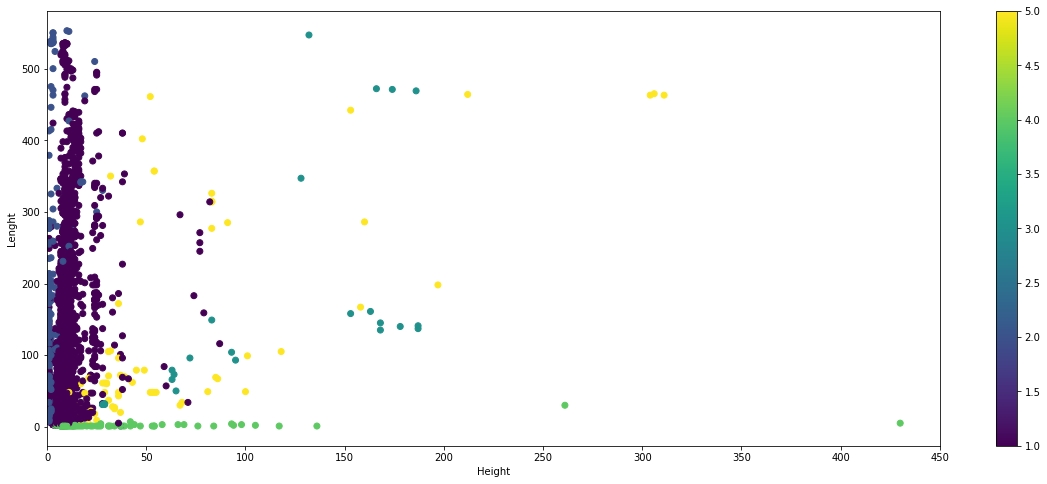

In [34]:
plt.figure(figsize=(20,8))
plt.scatter(x=DataBlocks["height"],y=DataBlocks["lenght"],c=DataBlocks["class"])
plt.xlim(0, 450)
plt.xlabel("Height")
plt.ylabel("Lenght")
plt.colorbar()

We can observe obvious patterns concerning horizontal lines and vertical lines (class 2 and 4).
Texts (class 1) vary much more in length than height, while graphs and pictures (class 3 and 5) vary in both. The advantage of this plot is that we can easily deduce attributes like area (Length x Height) and eccentricity (Length/Height).

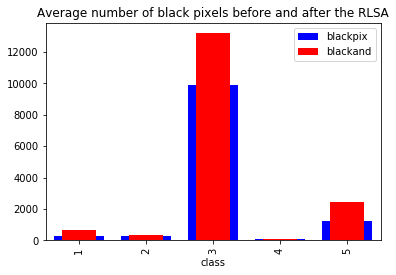

In [37]:
tab01=DataBlocks.pivot_table(index=["class"],values=["blackpix"],aggfunc="mean")
tab02=DataBlocks.pivot_table(index=["class"],values=["blackand"],aggfunc="mean")
ax0 = tab01["blackpix"].plot(kind='bar', color='blue', width=.75, legend=True)
tab02["blackand"].plot(kind='bar', color='red', width=.5, legend=True,title="Average number of black pixels before and after the RLSA")

We can see that graphics have much more pixel on average than any other class.

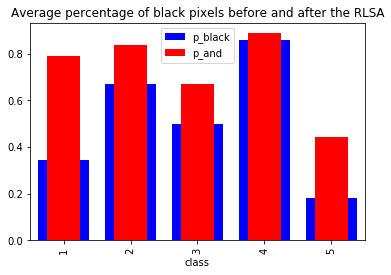

In [38]:
tab1=DataBlocks.pivot_table(index=["class"],values=["p_black"],aggfunc="mean")
tab2=DataBlocks.pivot_table(index=["class"],values=["p_and"],aggfunc="mean")
ax1 = tab1["p_black"].plot(kind='bar', color='blue', width=.75, legend=True)
tab2["p_and"].plot(kind='bar', color='red', width=.5, legend=True,title="Average percentage of black pixels before and after the RLSA")

We can see that pictures have the lowest average percentage of black pixels in both cases. Furthermore, vertical lines get less black pixels while texts get more compared to other classes. Also graphics have a normal percentage of black pixels compared to the high number of black pixels they also have, which means that graphics have a bigger area on average (which is confirmed by the scatterplot above).

Text(0.5, 1.0, 'Number of white-black transitions by class')

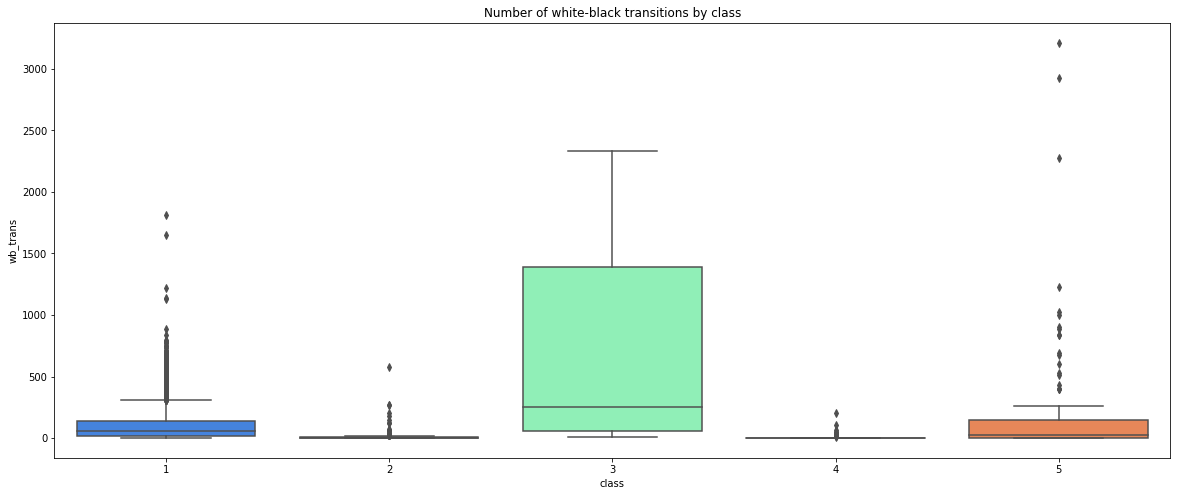

In [9]:
plt.figure(figsize=(20,8));
ax2 = sns.boxplot(x='class',y='wb_trans',data=DataBlocks,palette='rainbow') 
ax2.set_title("Number of white-black transitions by class")

Text(0.5, 1.0, 'Number of black pixels for each white-black transition by class')

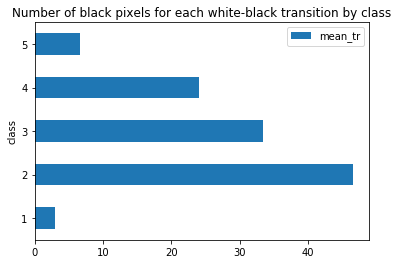

In [12]:
tab3=DataBlocks.pivot_table(index=["class"],values=["mean_tr"],aggfunc="mean")
tab3.plot.barh().set_title("Number of black pixels for each white-black transition by class")

We can see that despite the high number of white-black transition, graphics still have a high mean_tr 
(instead of having a low one like texts or pictures), which means that graphics have in average more black pixels and a bigger area (since the percentage of black pixels is not significantly higher compared to other classes).

## Modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [7]:
X=DataBlocks.iloc[:,:-1]
y=DataBlocks.iloc[:,-1:]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

### KNN method

In [16]:
from sklearn.neighbors import KNeighborsClassifier
param_grid1={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid1=GridSearchCV(KNeighborsClassifier(),param_grid1,cv=5)
grid1.fit(X_train,y_train)

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print(grid1.best_score_)
print(grid1.best_params_)
model1=grid1.best_estimator_

0.9597989949748744
{'metric': 'manhattan', 'n_neighbors': 5}


### Decision tree method

In [8]:
from sklearn.tree import DecisionTreeClassifier
param_grid2={'max_depth':np.arange(1,10),'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,5),'criterion':['gini', 'entropy']}
grid2=GridSearchCV(DecisionTreeClassifier(),param_grid2,cv=5)
grid2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
   

In [9]:
print(grid2.best_score_)
print(grid2.best_params_)
model2=grid2.best_estimator_

0.9693924166285975
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}


### SVM (support vector machine) method

In [26]:
from sklearn.svm import SVC
param_grid3 = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid3 = GridSearchCV(SVC(), param_grid3, refit = True, verbose = 3)
grid3.fit(X_train,y_train)

C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.897, total=   5.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.898, total=   5.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.899, total=   5.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.897, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.898, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.898, total=   5.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.902, total=   4.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.901, total=   4.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.903, total=   4.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.907, total=   2.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.908, total=   2.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.908, total=   2.6s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.909, total=   1.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.905, total=   1.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.908, total=   1.1s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.908, total=   5.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.907, total=   5.6s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.903, total=   5.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.912, total=   5.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.914, total=   5.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.907, total=   5.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.920, total=   5.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.929, total=   4.9s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.919, total=   4.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.937, total=   3.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.937, total=   2.8s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.928, total=   3.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.940, total=   1.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.938, total=   1.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.942, total=   1.1s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.908, total=   5.7s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.907, total=   5.7s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.903, total=   5.8s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.914, total=   5.6s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.914, total=   5.4s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.910, total=   5.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   4.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.931, total=   4.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.922, total=   4.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.938, total=   3.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.943, total=   3.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.937, total=   3.7s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.954, total=   1.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.952, total=   1.2s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.948, total=   1.2s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.908, total=   5.8s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.907, total=   5.7s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... C=100, gamma=1, kernel=rbf, score=0.903, total=   5.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.914, total=   5.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.914, total=   5.6s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.910, total=   6.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.919, total=   5.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.929, total=   4.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.920, total=   4.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.938, total=   3.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.937, total=   3.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.935, total=   3.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.954, total=   1.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.955, total=   1.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.946, total=   1.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.908, total=   5.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.907, total=   5.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.903, total=   5.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.914, total=   5.7s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.914, total=   5.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.910, total=   5.7s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.919, total=   5.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.928, total=   4.7s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.919, total=   4.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.933, total=   3.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.934, total=   3.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.934, total=   3.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.953, total=   1.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.954, total=   1.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................


C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.949, total=   1.4s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.1min finished
C:\Users\gusta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [31]:
print(grid3.best_score_)
print(grid3.best_params_)
model3=grid3.best_estimator_

0.9520328917313842
{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


### Conclusion

In [28]:
print(model1.score(X_test,y_test))
print(model2.score(X_test,y_test))
print(model3.score(X_test,y_test))

0.9525114155251142
0.9671232876712329
0.9497716894977168


The second model has the best score

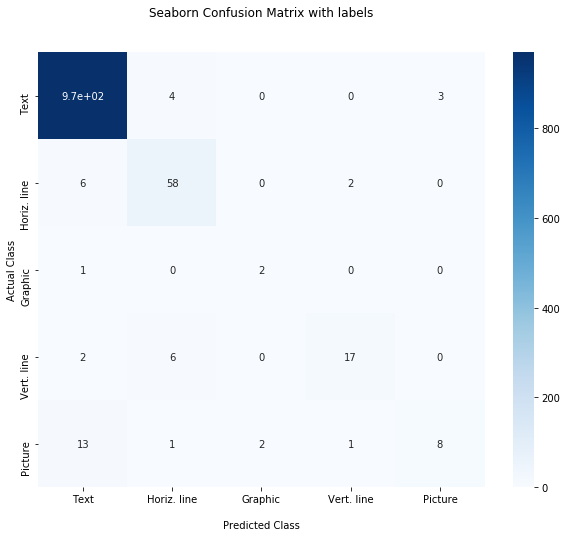

In [19]:
cf=confusion_matrix(y_test,model2.predict(X_test))

plt.figure(figsize=(10,8))
ax3 = sns.heatmap(cf, annot=True, cmap='Blues')
ax3.set_title('Seaborn Confusion Matrix with labels\n\n');
ax3.set_xlabel('\nPredicted Class')
ax3.set_ylabel('Actual Class');
ax3.xaxis.set_ticklabels(['Text','Horiz. line','Graphic','Vert. line','Picture'])
ax3.yaxis.set_ticklabels(['Text','Horiz. line','Graphic','Vert. line','Picture'])

# We add this part to prevent the graph from being cut at the top and bottom
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.show()